In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader
from sklearn.model_selection import train_test_split

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fashionmnist/t10k-labels-idx1-ubyte
/kaggle/input/fashionmnist/t10k-images-idx3-ubyte
/kaggle/input/fashionmnist/fashion-mnist_test.csv
/kaggle/input/fashionmnist/fashion-mnist_train.csv
/kaggle/input/fashionmnist/train-labels-idx1-ubyte
/kaggle/input/fashionmnist/train-images-idx3-ubyte


In [34]:
df_train = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')
df_test = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_test.csv')

X_train = df_train.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_train = df_train.iloc[:, 0].values

X_test = df_test.iloc[:, 1:].values.reshape(-1, 28, 28).astype('float32')
y_test = df_test.iloc[:, 0].values

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])
X_train_tensor = torch.tensor(X_train).unsqueeze(1) / 255.0 
X_test_tensor = torch.tensor(X_test).unsqueeze(1) / 255.0
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [3]:
images, labels = next(iter(test_loader))
print("Image batch shape:", images.shape)   
print("Label batch shape:", labels.shape) 

Image batch shape: torch.Size([64, 1, 28, 28])
Label batch shape: torch.Size([64])


1: Shirt
2: Coat
3: Pullover
4: Dress
5: Pullover
6: Sneaker
7: Coat
8: Dress
9: Coat
10: Coat
11: T-shirt/top
12: Sneaker
13: Trouser
14: Sandal
15: Coat
16: Ankle boot


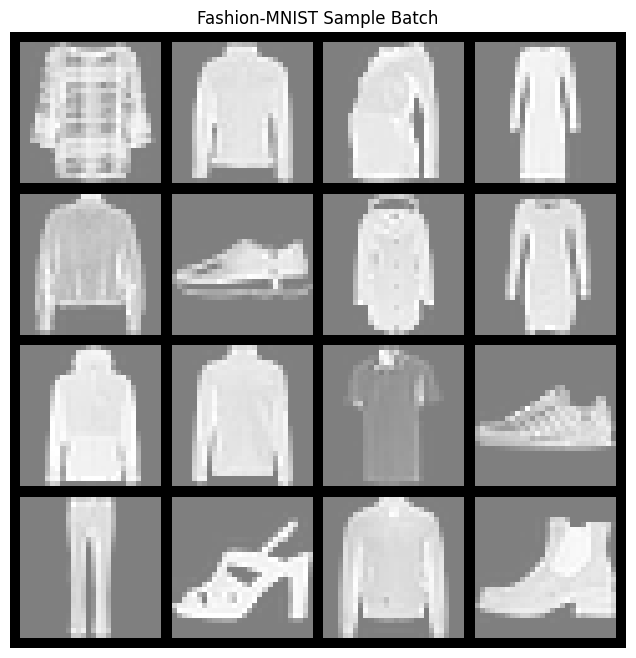

In [4]:
import matplotlib.pyplot as plt
import torchvision


classes = [
    "T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
    "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"
]


images, labels = next(iter(train_loader))


images = images * 0.5 + 0.5  


grid_img = torchvision.utils.make_grid(images[:16], nrow=4)

plt.figure(figsize=(8, 8))
plt.imshow(grid_img.permute(1, 2, 0)) 
plt.axis('off')

for i in range(16):
    print(f"{i+1}: {classes[labels[i]]}")

plt.title("Fashion-MNIST Sample Batch")
plt.show()

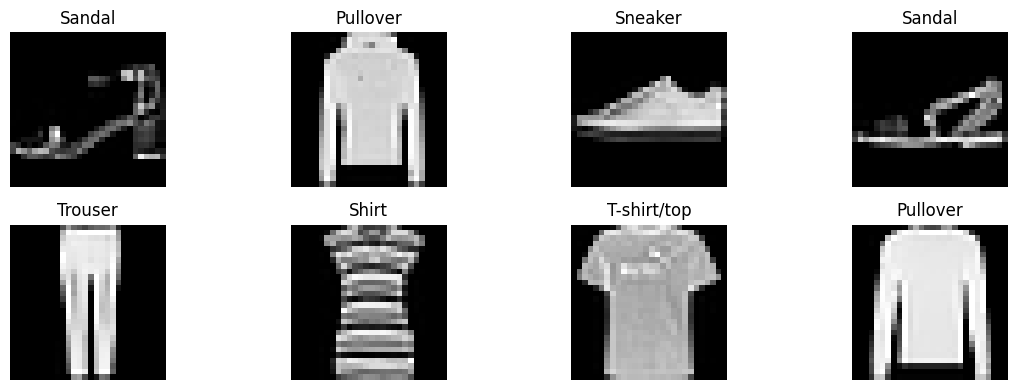

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def imshow(img):
    img = img.squeeze()  
    npimg = img.numpy()
    plt.imshow(npimg, cmap='gray')
    plt.axis('off')


dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.figure(figsize=(12, 4))
for i in range(8):
    plt.subplot(2, 4, i + 1)
    imshow(images[i])
    plt.title(class_names[labels[i]])
plt.tight_layout()
plt.show()


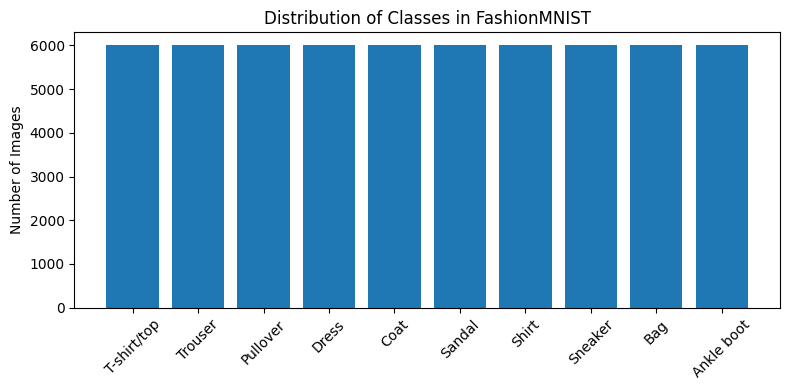

In [39]:
import collections

all_labels = []
for _, labels in train_loader:
    all_labels.extend(labels.tolist())

counter = collections.Counter(all_labels)
label_freq = [counter[i] for i in range(10)]

plt.figure(figsize=(8, 4))
plt.bar(class_names, label_freq)
plt.xticks(rotation=45)
plt.title("Distribution of Classes in FashionMNIST")
plt.ylabel("Number of Images")
plt.tight_layout()
plt.show()


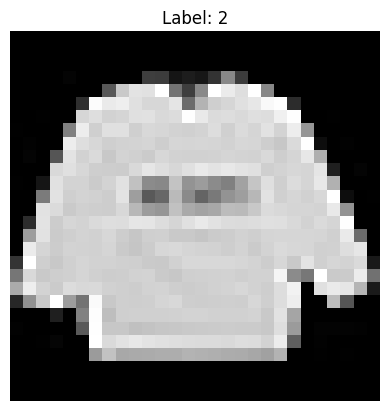

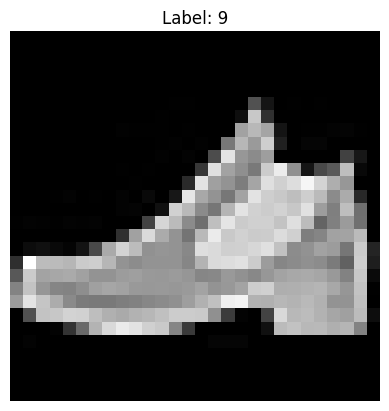

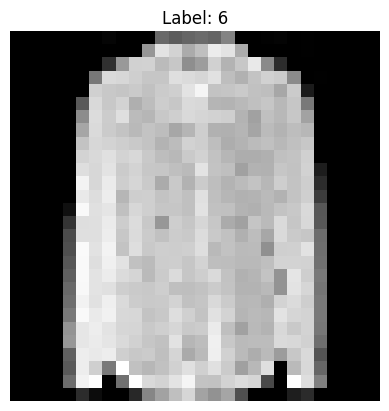

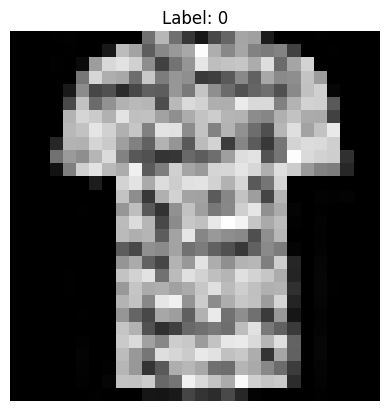

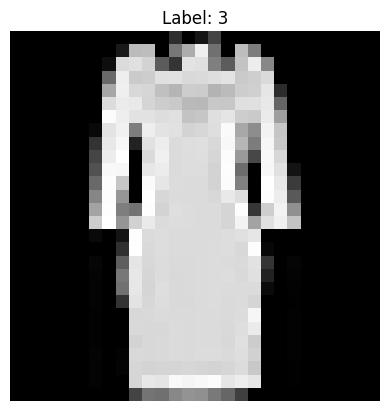

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv('/kaggle/input/fashionmnist/fashion-mnist_train.csv')

labels = df['label']
images = df.drop('label', axis=1).values

def show_image(index):
    img = images[index].reshape(28, 28)
    plt.imshow(img, cmap='gray')
    plt.title(f"Label: {labels[index]}")
    plt.axis('off')
    plt.show()

for i in range(5):
    show_image(i)


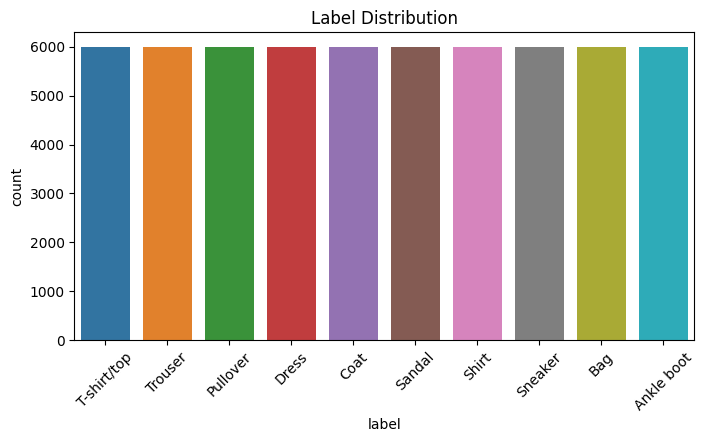

In [8]:
import seaborn as sns

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(8, 4))
sns.countplot(x=labels)
plt.xticks(ticks=range(10), labels=class_names, rotation=45)
plt.title("Label Distribution")
plt.show()


In [9]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


In [10]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.layer1 = nn.Sequential(
            nn.Conv2d(1, 32, 3, padding=1), 
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(32, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2, 2)
        )
        self.fc1 = nn.Linear(64 * 7 * 7, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.view(-1, 64 * 7 * 7)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

In [11]:
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

In [12]:
for epoch in range(10):
    for images, labels in train_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f"Epoch {epoch+1}, Loss: {loss.item():.4f}")

Epoch 1, Loss: 0.3894
Epoch 2, Loss: 0.4217
Epoch 3, Loss: 0.6206
Epoch 4, Loss: 0.4964
Epoch 5, Loss: 0.4271
Epoch 6, Loss: 0.4190
Epoch 7, Loss: 0.4428
Epoch 8, Loss: 0.5539
Epoch 9, Loss: 0.5263
Epoch 10, Loss: 0.5727


In [21]:
correct = 0
total = 0

with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device) 
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

print(correct, total)

accuracy = 100 * correct / total
print(f"Test Accuracy on mnist_test.csv: {accuracy:.2f}%")

8315 10000
Test Accuracy on mnist_test.csv: 83.15%


In [35]:
images, labels = next(iter(test_loader))
images, labels = images.to(device), labels.to(device)
images = images.cpu()
labels = labels.cpu()
with torch.no_grad():
    outputs = model(images.to(device))
    _, predicted = torch.max(outputs, 1)
    predicted = predicted.cpu()
 
print(predicted)

tensor([2, 8, 7, 9, 8, 0, 3, 9, 7, 5, 6, 6, 0, 9, 3, 8, 2, 3, 3, 8, 3, 3, 0, 8,
        3, 9, 0, 8, 0, 8, 6, 7, 6, 6, 1, 8, 9, 0, 8, 5, 0, 4, 8, 0, 6, 7, 4, 3,
        0, 0, 1, 9, 3, 5, 3, 6, 7, 8, 9, 8, 2, 7, 4, 4])


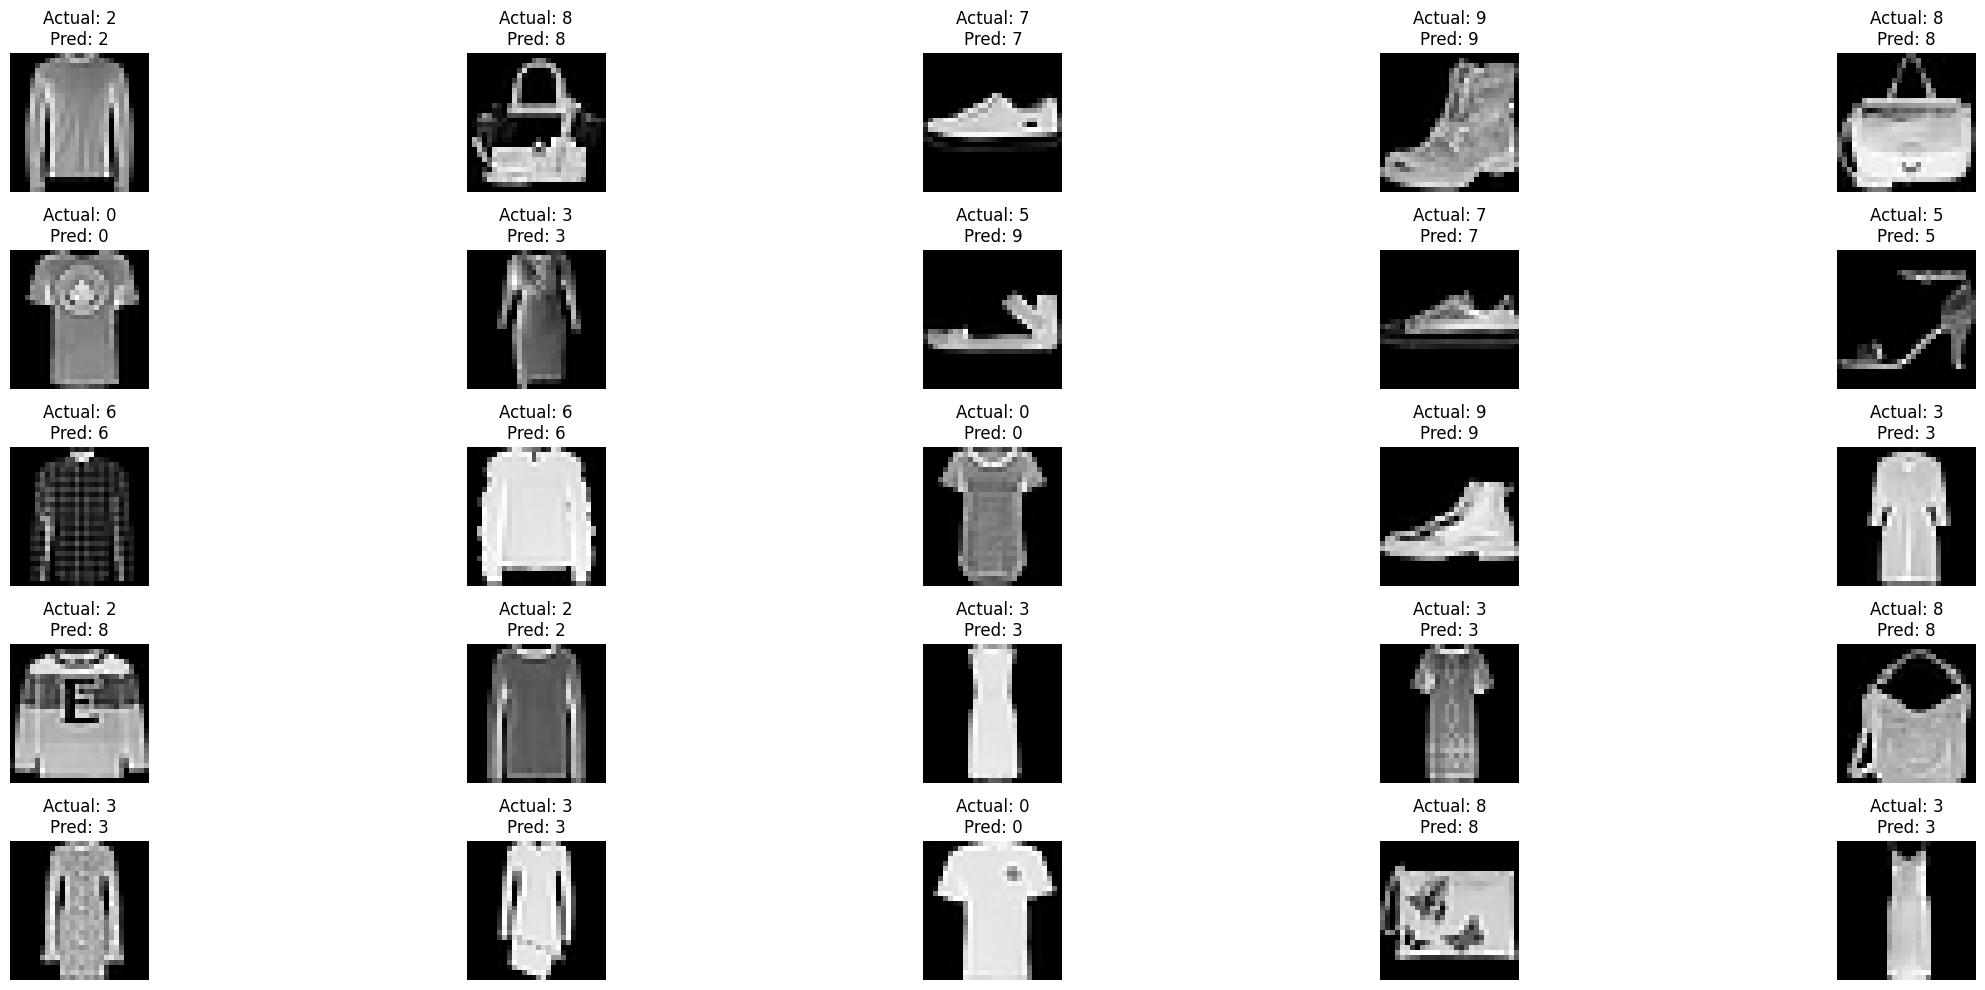

In [36]:
fig = plt.figure(figsize=(25, 10))
for idx in range(25):
    ax = fig.add_subplot(5, 5, idx+1)
    ax.imshow(images[idx][0], cmap='gray') 
    ax.set_title(f"Actual: {labels[idx].item()}\nPred: {predicted[idx].item()}")
    ax.axis('off')

plt.tight_layout()
plt.show()